In [47]:
# Importing packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Importing data
df = pd.read_csv('InsNova_train.csv')
df['pure_premium'] = df['claim_cost'] / df['exposure']
df['avg_cost'] = df['claim_cost'] / np.fmax(df['claim_count'], 1)
df['frequency'] = df['claim_count'] / df['exposure']
df['veh_value2'] = df['veh_value'] ** 2
for i in ['veh_age', 'dr_age']:
    df[i] = df[i].astype('category')

In [7]:
for i in ['veh_body', 'area', 'veh_age', 'gender', 'dr_age']:
    print(df[i].value_counts())

SEDAN    7410
HBACK    6347
STNWG    5348
UTE      1529
TRUCK     613
HDTOP     524
MIBUS     252
PANVN     245
COUPE     244
MCARA      39
CONVT      31
BUS        19
RDSTR       9
Name: veh_body, dtype: int64
C    6846
A    5436
B    4445
D    2723
E    1969
F    1191
Name: area, dtype: int64
3    6667
4    6343
2    5540
1    4060
Name: veh_age, dtype: int64
F    12850
M     9760
Name: gender, dtype: int64
4    5368
3    5266
2    4317
5    3556
6    2216
1    1887
Name: dr_age, dtype: int64


In [17]:
#veh_body
df.groupby('veh_body')[['veh_value', 'pure_premium', 'frequency', 'avg_cost']].mean()

,veh_value,pure_premium,frequency,avg_cost
veh_body,,,,
BUS,1.683684,215.538244,0.381662,120.955704
CONVT,7.866452,0.000000,0.000000,0.000000
COUPE,2.121434,696.678700,0.251474,200.155129
HBACK,1.265492,506.809952,0.198463,122.841894
HDTOP,2.177805,592.607805,0.203202,292.221632
MCARA,2.620256,119.902908,0.291471,40.688583
MIBUS,1.738373,167.354873,0.079234,129.620990
PANVN,1.580286,171.756168,0.133385,102.616960
RDSTR,4.920000,236.776669,0.466407,90.334208


In [31]:
df.groupby('veh_body')[['veh_value', 'pure_premium', 'frequency', 'avg_cost']].var()

,veh_value,pure_premium,frequency,avg_cost
veh_body,,,,
BUS,2.037625,2.485713e+05,0.781228,6.809348e+04
CONVT,23.609830,0.000000e+00,0.000000,0.000000e+00
COUPE,6.422677,1.937306e+07,1.248565,1.098848e+06
HBACK,0.300570,8.856359e+07,1.786398,7.911155e+05
HDTOP,0.772262,2.845822e+07,0.649728,4.389071e+06
MCARA,2.556092,2.023036e+05,1.164015,1.499530e+04
MIBUS,0.529169,1.538059e+06,0.137998,1.377965e+06
PANVN,0.732136,1.333993e+06,0.281033,4.863448e+05
RDSTR,3.546050,4.019053e+05,1.125573,4.260314e+04


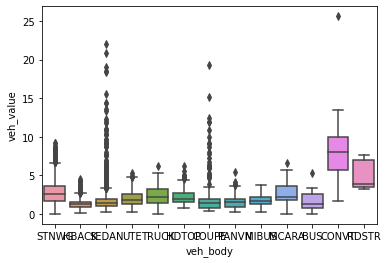

In [18]:
vel_val_boxp = sns.boxplot(x="veh_body", y="veh_value", data=df)

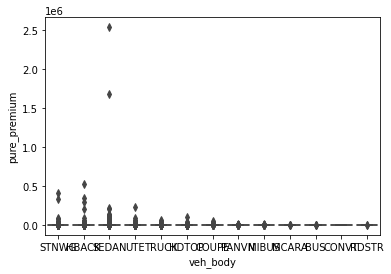

In [20]:
pure_premium_boxp = sns.boxplot(x="veh_body", y="pure_premium", data=df)

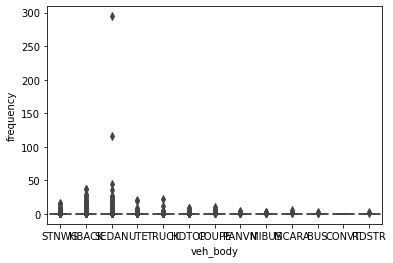

In [21]:
freq_boxp = sns.boxplot(x="veh_body", y="frequency", data=df)

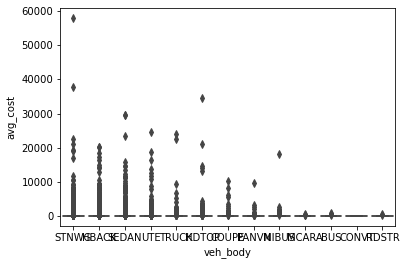

In [22]:
avg_cost_boxp = sns.boxplot(x="veh_body", y="avg_cost", data=df)

In [29]:
#by area
df.groupby('area')[['pure_premium', 'frequency', 'avg_cost']].mean()

,pure_premium,frequency,avg_cost
area,,,
A,3.731538e+07,1.145241,1.427070e+06
B,7.604687e+07,1.204836,9.151180e+05
C,6.347865e+07,1.756366,9.084231e+05
D,3.405808e+09,37.130924,1.044050e+06
E,1.796679e+07,1.424508,1.028564e+06
F,1.645373e+08,1.422570,3.405265e+06


In [30]:
df.groupby('area')[['pure_premium', 'frequency', 'avg_cost']].var()

,pure_premium,frequency,avg_cost
area,,,
A,3.731538e+07,1.145241,1.427070e+06
B,7.604687e+07,1.204836,9.151180e+05
C,6.347865e+07,1.756366,9.084231e+05
D,3.405808e+09,37.130924,1.044050e+06
E,1.796679e+07,1.424508,1.028564e+06
F,1.645373e+08,1.422570,3.405265e+06


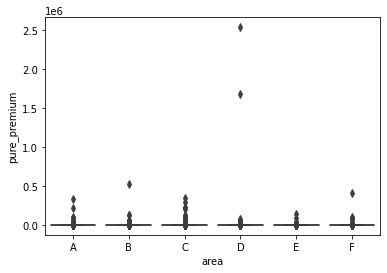

In [23]:
area_boxp1 = sns.boxplot(x="area", y="pure_premium", data=df)

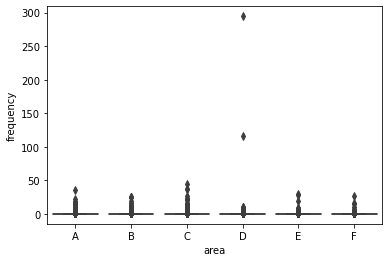

In [24]:
area_boxp2 = sns.boxplot(x="area", y="frequency", data=df)

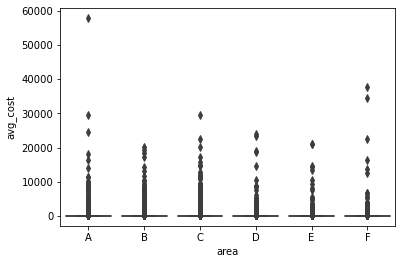

In [26]:
area_boxp3 = sns.boxplot(x="area", y="avg_cost", data=df)

In [72]:
#by age
df.groupby('veh_age')[['pure_premium', 'frequency', 'avg_cost']].mean()

,pure_premium,frequency,avg_cost
veh_age,,,
1,339.569032,0.163668,89.712563
2,561.852309,0.185089,144.346721
3,1012.586262,0.217617,140.106270
4,526.879603,0.205971,145.666032


In [32]:
df.groupby('veh_age')[['pure_premium', 'frequency', 'avg_cost']].var()

,pure_premium,frequency,avg_cost
veh_age,,,
1,4.843337e+07,0.914285,7.249688e+05
2,1.090533e+08,1.202773,1.791796e+06
3,1.412187e+09,15.856872,1.094254e+06
4,4.190673e+07,2.066630,1.072062e+06


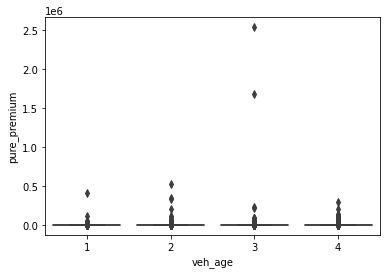

In [34]:
age_boxp1 = sns.boxplot(x="veh_age", y="pure_premium", data=df)

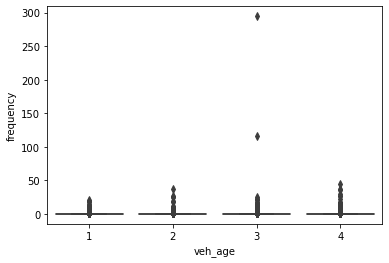

In [35]:
age_boxp2 = sns.boxplot(x="veh_age", y="frequency", data=df)

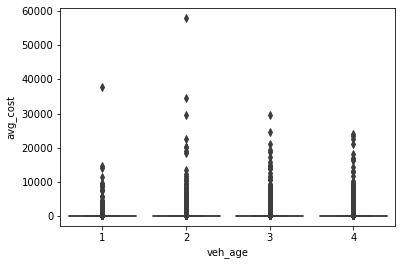

In [36]:
age_boxp3 = sns.boxplot(x="veh_age", y="avg_cost", data=df)

In [73]:
#by gender
df.groupby('gender')[['pure_premium', 'frequency', 'avg_cost']].mean()

,pure_premium,frequency,avg_cost
gender,,,
F,719.031774,0.213803,120.730493
M,547.608985,0.174165,150.673683


In [37]:
df.groupby('gender')[['pure_premium', 'frequency', 'avg_cost']].var()

,pure_premium,frequency,avg_cost
gender,,,
F,7.555557e+08,9.118651,8.549489e+05
M,7.922475e+07,1.231284,1.637481e+06


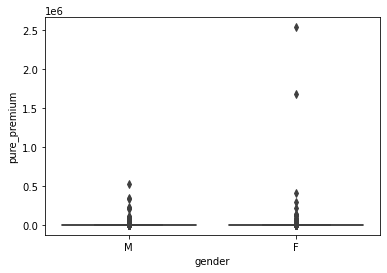

In [38]:
gender_boxp1 = sns.boxplot(x="gender", y="pure_premium", data=df)

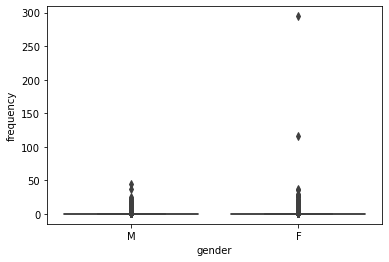

In [39]:
gender_boxp2 = sns.boxplot(x="gender", y="frequency", data=df)

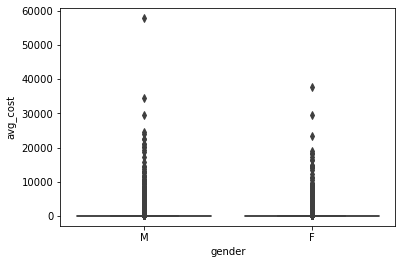

In [40]:
gender_boxp3 = sns.boxplot(x="gender", y="avg_cost", data=df)

In [74]:
#by dr_age
df.groupby('dr_age')[['pure_premium', 'frequency', 'avg_cost']].mean()

,pure_premium,frequency,avg_cost
dr_age,,,
1,2324.219338,0.412778,218.316702
2,622.918410,0.191636,178.653321
3,509.327985,0.187703,131.245609
4,593.970641,0.186409,113.316155
5,329.879018,0.162081,86.606207
6,210.142585,0.124355,104.404247


In [41]:
df.groupby('dr_age')[['pure_premium', 'frequency', 'avg_cost']].var()

,pure_premium,frequency,avg_cost
dr_age,,,
1,3.553585e+09,48.234725,1.814729e+06
2,8.968821e+07,1.276048,2.527269e+06
3,8.116614e+07,1.232990,8.387783e+05
4,5.316998e+08,3.349397,7.799964e+05
5,2.742339e+07,2.028492,6.496282e+05
6,3.443877e+06,0.418953,7.647825e+05


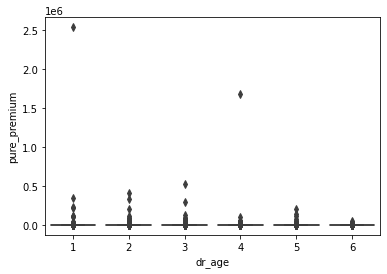

In [42]:
age_boxp1 = sns.boxplot(x="dr_age", y="pure_premium", data=df)

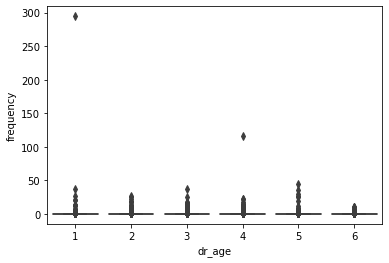

In [43]:
age_boxp2 = sns.boxplot(x="dr_age", y="frequency", data=df)

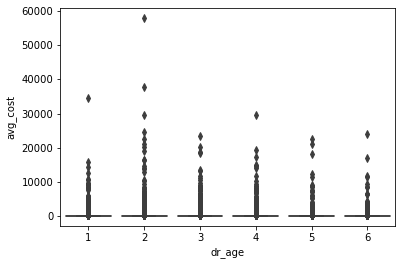

In [44]:
age_boxp3 = sns.boxplot(x="dr_age", y="avg_cost", data=df)

In [75]:
df#take a look at tthe data

,id,veh_value,exposure,veh_body,veh_age,gender,area,dr_age,claim_ind,claim_count,claim_cost,pure_premium,avg_cost,frequency,veh_value2
0,3,6.43,0.241898,STNWG,1,M,A,3,0,0,0.000000,0.000000,0.000000,0.000000,41.3449
1,6,4.46,0.856523,STNWG,1,M,A,3,0,0,0.000000,0.000000,0.000000,0.000000,19.8916
2,20,1.70,0.417517,HBACK,1,M,A,4,0,0,0.000000,0.000000,0.000000,0.000000,2.8900
3,21,0.48,0.626975,SEDAN,4,F,A,6,0,0,0.000000,0.000000,0.000000,0.000000,0.2304
4,28,1.96,0.089770,HBACK,1,F,A,2,0,0,0.000000,0.000000,0.000000,0.000000,3.8416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22605,67847,2.30,0.909445,UTE,3,F,F,2,1,2,5163.224416,5677.335448,2581.612208,2.199143,5.2900
22606,67848,1.49,0.999321,SEDAN,2,F,F,2,1,2,5230.467325,5234.019785,2615.233662,2.001358,2.2201
22607,67849,1.65,0.783724,SEDAN,2,F,F,3,1,2,1502.970766,1917.729413,751.485383,2.551918,2.7225
22608,67851,2.39,0.841333,SEDAN,1,F,F,4,1,2,1169.773526,1390.381147,584.886763,2.377180,5.7121


(array([5.08892472e-04, 4.65233830e-06, 1.58133666e-06, 9.16716906e-07,
        8.70881060e-07, 2.52097149e-07, 2.29179226e-07, 1.83343381e-07,
        1.37507536e-07, 1.14589613e-07, 1.14589613e-07, 4.58358453e-08,
        6.87537679e-08, 0.00000000e+00, 0.00000000e+00, 4.58358453e-08,
        0.00000000e+00, 2.29179226e-08, 0.00000000e+00, 2.29179226e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.29179226e-08]),
 array([    0.        ,  1929.85281867,  3859.70563733,  5789.558456  ,
         7719.41127467,  9649.26409333, 11579.116912  , 13508.96973067,
        15438.82254933, 17368.675368  , 19298.52818667, 21228.38100533,
        23158.233824  , 25088.08664267, 27017.93946133, 28947.79228   ,
        30877.64509867, 32807.49791733, 34737.350736  , 36667.20355467,
        38597.05637333, 40526.909192  , 42456.76201067, 44386.61482933,
        46316.467648  

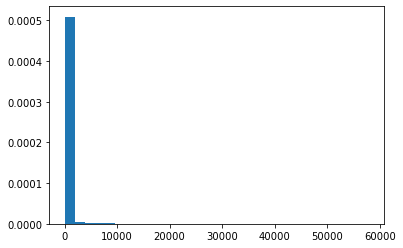

In [50]:
#histogram of all claim cost
plt.hist(df["claim_cost"], density=True, bins=30)

(array([3.94214901e-04, 6.03355567e-05, 2.27105747e-05, 1.25416607e-05,
        1.18637331e-05, 4.40652942e-06, 2.37274661e-06, 2.71171041e-06,
        2.03378281e-06, 1.69481901e-06, 1.69481901e-06, 6.77927603e-07,
        1.01689140e-06, 0.00000000e+00, 0.00000000e+00, 6.77927603e-07,
        0.00000000e+00, 3.38963802e-07, 0.00000000e+00, 3.38963802e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.38963802e-07]),
 array([  200.0006035 ,  2123.18673538,  4046.37286727,  5969.55899915,
         7892.74513103,  9815.93126292, 11739.1173948 , 13662.30352668,
        15585.48965857, 17508.67579045, 19431.86192233, 21355.04805422,
        23278.2341861 , 25201.42031798, 27124.60644987, 29047.79258175,
        30970.97871363, 32894.16484552, 34817.3509774 , 36740.53710928,
        38663.72324117, 40586.90937305, 42510.09550493, 44433.28163682,
        46356.4677687 

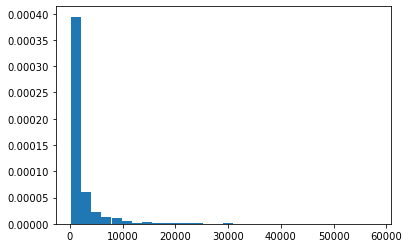

In [64]:
#histogram of non0zero claim cost
nonzero = df["claim_cost"] > 0
nonzero.df = df[nonzero]
plt.hist(nonzero.df["claim_cost"], density=True, bins=30)

In [73]:
print("Total observations:",len(df))
print("Number of non-zero claim-cost observations:",len(nonzero.df))

Total observations: 22610
Number of non-zero claim-cost observations: 1534


In [65]:
#correaltion matrix
df_losses = df[df['claim_ind'] == 1].drop(['id', 'claim_ind'], axis=1)
df_losses.corr()

,veh_value,exposure,claim_count,claim_cost,pure_premium,avg_cost,frequency,veh_value2
veh_value,1.000000,0.057004,-0.033000,0.007717,-0.029368,0.010561,-0.062412,0.912970
exposure,0.057004,1.000000,0.091385,-0.138055,-0.177786,-0.148792,-0.321405,0.044020
claim_count,-0.033000,0.091385,1.000000,0.066965,-0.013581,-0.029258,0.015687,-0.029686
claim_cost,0.007717,-0.138055,0.066965,1.000000,0.282296,0.988374,0.114599,0.028109
pure_premium,-0.029368,-0.177786,-0.013581,0.282296,1.000000,0.287870,0.917884,-0.016104
avg_cost,0.010561,-0.148792,-0.029258,0.988374,0.287870,1.000000,0.116234,0.031916
frequency,-0.062412,-0.321405,0.015687,0.114599,0.917884,0.116234,1.000000,-0.041719
veh_value2,0.912970,0.044020,-0.029686,0.028109,-0.016104,0.031916,-0.041719,1.000000
